## *Bankers in the Ivory Tower*
### By Charlie Eaton

### Figure 5.1: Percentage of US undergrad enrollments by sector

In [1]:
*ssc install blindschemes
*ssc install grc1leg

In [2]:
qui use data/d_bankers_for_profits, replace

In [3]:
qui gen sector=control
qui replace sector=4 if control==1 & iclevel>1 & iclevel<.
qui drop if sector==.

In [4]:
quietly {
collapse (rawsum) under* fgrnt_n , by(sector year)
foreach var in undertotlt underbkaat underhispt undertotlw fgrnt_n {
bysort year: egen total`var'=total(`var')
gen pct`var'=`var'/total`var' * 100
}
keep pct* year sector
reshape wide pct*, i(year) j(sector)
}

In [5]:
foreach var in pctundertotlt pctunderbkaat pctunderhispt pctundertotlw pctfgrnt_n  {
    label var `var'1 "state"
    label var `var'2 "non-profit"
    label var `var'3 "for-profit"
    label var `var'4 "community"
}

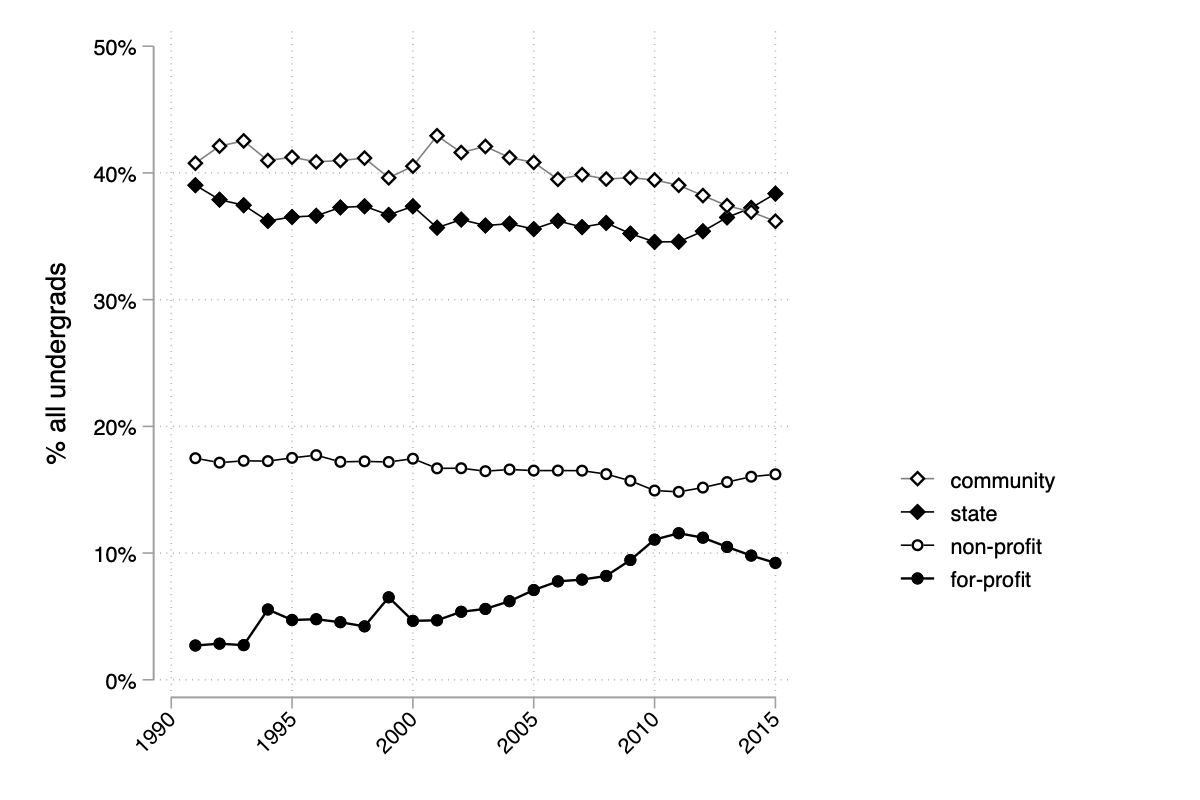

In [6]:
set scheme plotplainblind
tw (connect pctundertotlt* year if year>1990 & year<2016, sort msym(D O O D) ///
	mc(black black black black) legend(order(4 1 2 3 ) bmargin(vlarge)) ///
	mfc(black white black white ) ///
	lp(l l l l) lc(black black black gs8) ///
	lw(thin thin medium thin) ///
	xlabel(1990(5)2015, ang(45)) ///
	ylabel(0 "0%" 10 "10%" 20 "20%" 30 "30%" 40 "40%" 50 "50%") ///
	ytitle("% all undergrads") ///
	xtitle("") name(undergrads, replace)) 

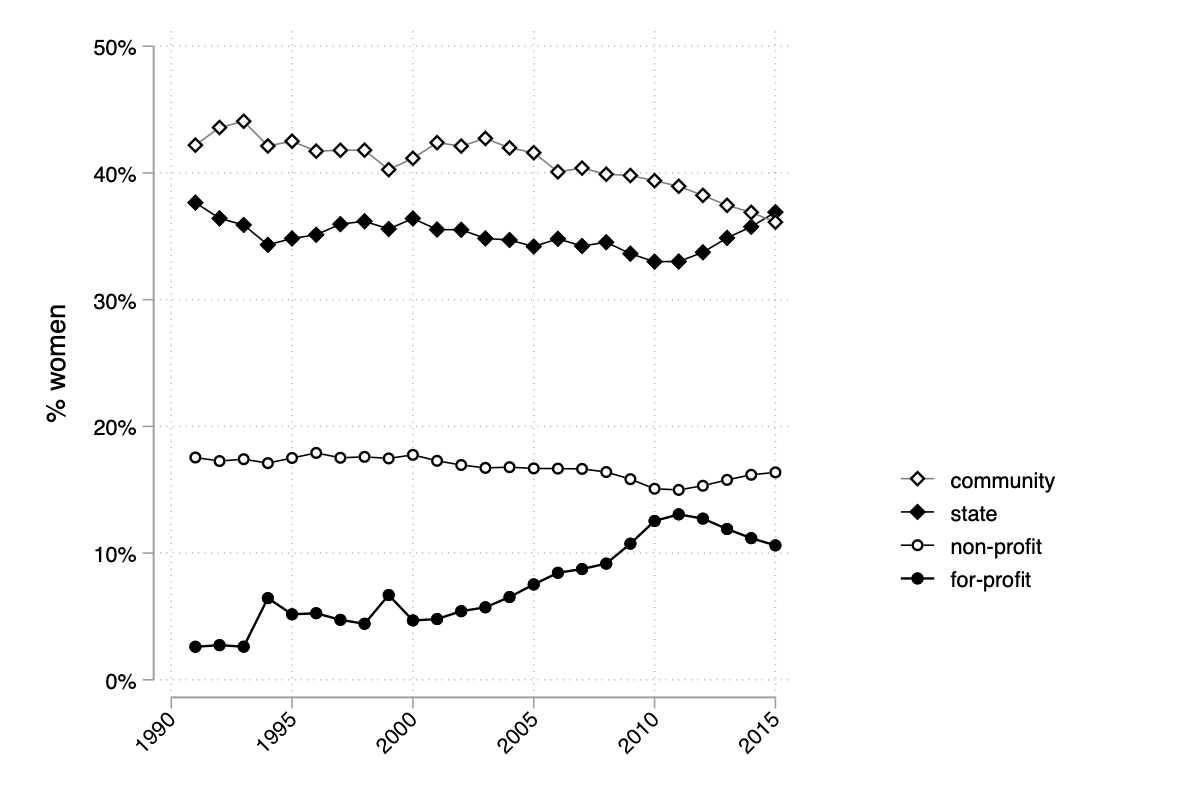

In [7]:
set scheme plotplainblind
tw (connect pctundertotlw* year if year>1990 & year<2016, sort msym(D O O D) ///
	mc(black black black black) legend(order(4 1 2 3 ) bmargin(vlarge)) ///
	mfc(black white black white ) ///
	lp(l l l l) lc(black black black gs8) ///
	lw(thin thin medium thin) ///
	xlabel(1990(5)2015, ang(45)) ///
	ylabel(0 "0%" 10 "10%" 20 "20%" 30 "30%" 40 "40%" 50 "50%") ///
	ytitle("% women") ///
	xtitle("") name(women, replace)) 

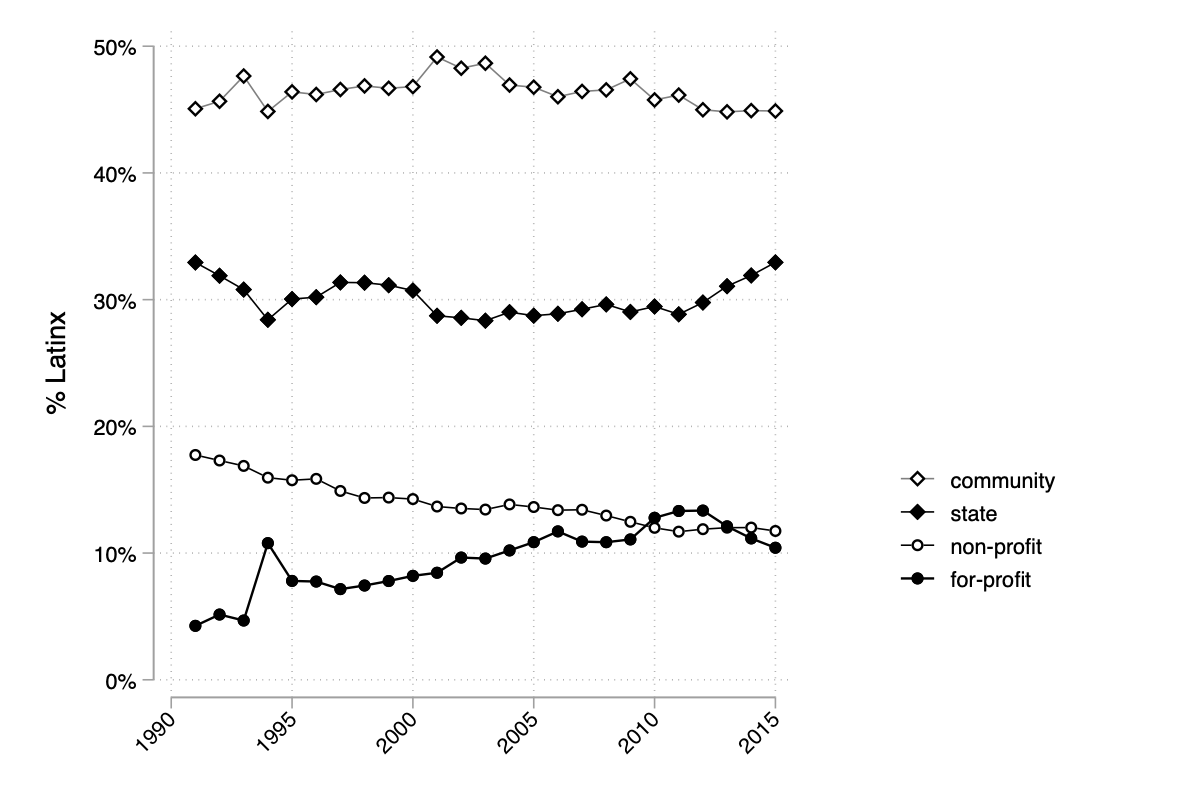

In [8]:
tw (connect pctunderhispt* year if year>1990 & year<2016, sort msym(D O O D) ///
	mc(black black black black) legend(order(4 1 2 3 ) bmargin(vlarge)) ///
	mfc(black white black white ) ///
	lp(l l l l) lc(black black black gs8) ///
	lw(thin thin medium thin) ///
	xlabel(1990(5)2015, ang(45)) ///
	ylabel(0 "0%" 10 "10%" 20 "20%" 30 "30%" 40 "40%" 50 "50%") ///
	ytitle("% Latinx") ///
	xtitle("") name(latinx, replace)) 

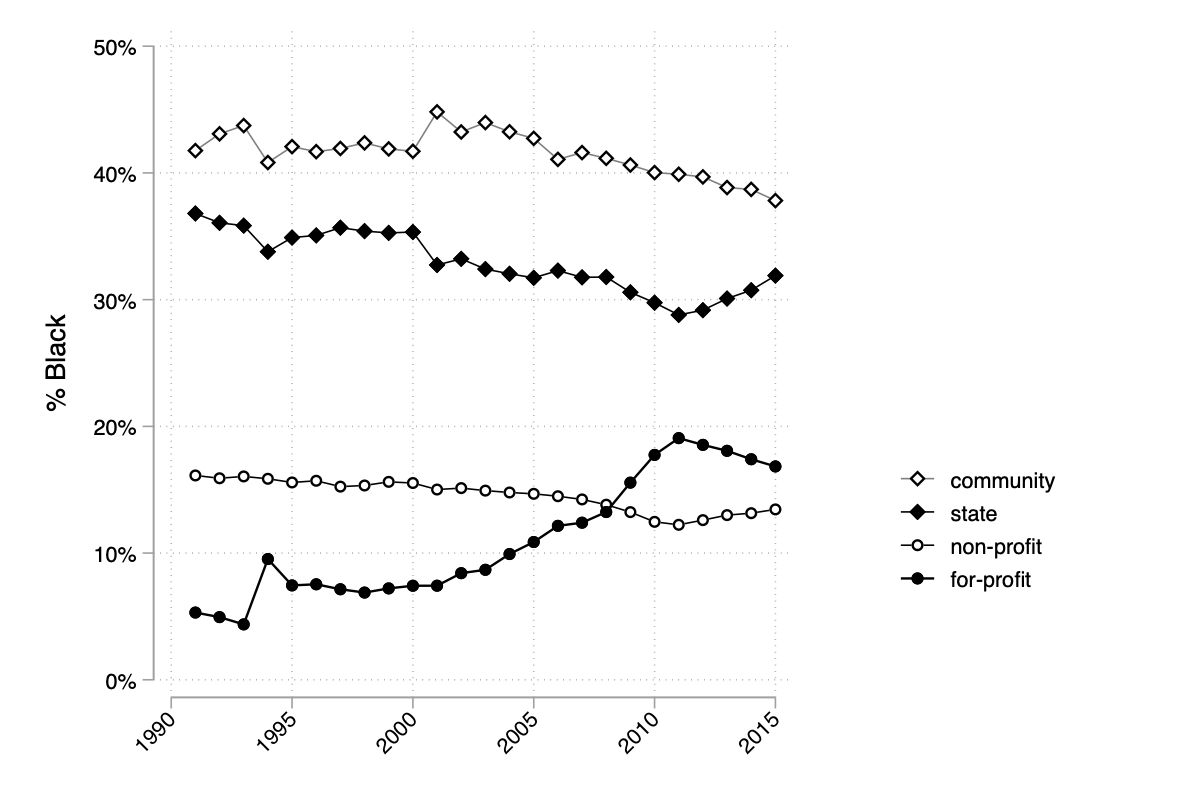

In [9]:
tw (connect pctunderbkaat* year if year>1990 & year<2016, sort msym(D O O D) ///
	mc(black black black black) legend(order(4 1 2 3 ) bmargin(vlarge)) ///
	mfc(black white black white ) ///
	lp(l l l l) lc(black black black gs8) ///
	lw(thin thin medium thin) ///
	xlabel(1990(5)2015, ang(45)) ///
	ylabel(0 "0%" 10 "10%" 20 "20%" 30 "30%" 40 "40%" 50 "50%") ///
	ytitle("% Black") ///
	xtitle("") name(black, replace))

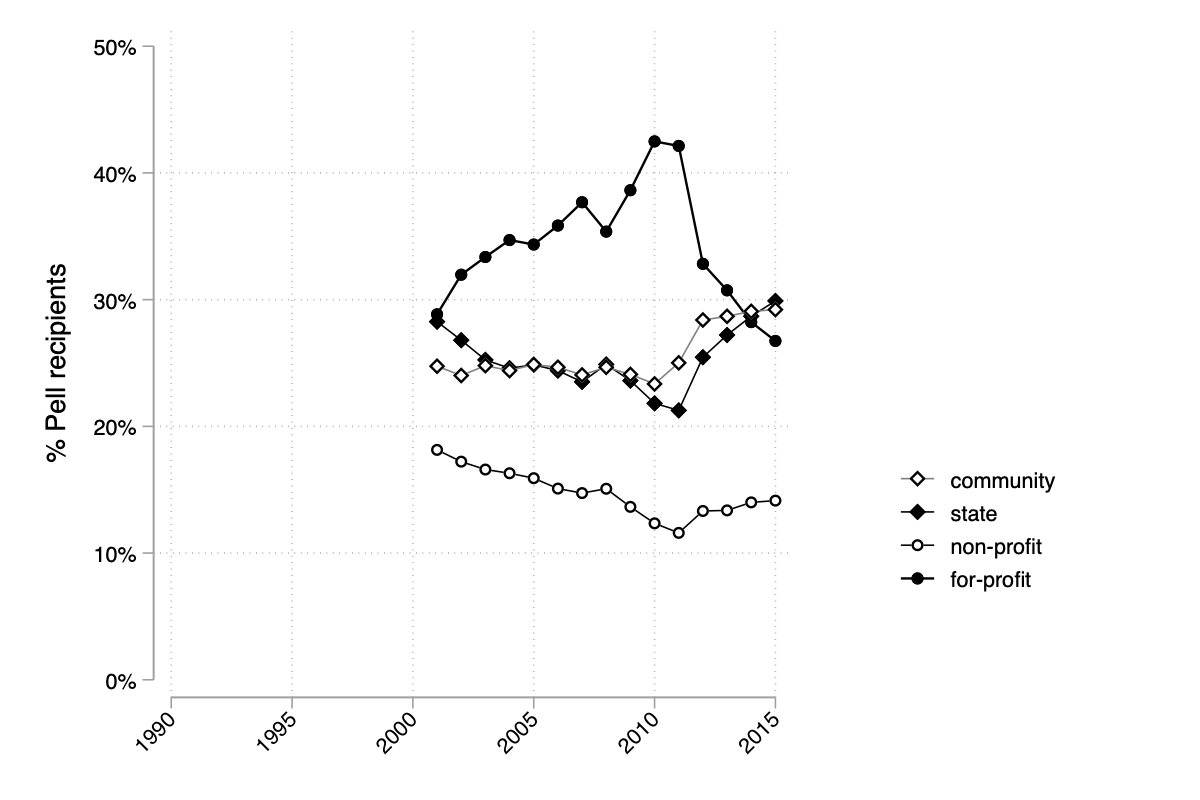

In [10]:
tw (connect pctfgrnt_n* year if year>1990 & year<2016, sort msym(D O O D) ///
	mc(black black black black) legend(order(4 1 2 3 ) bmargin(vlarge)) ///
	mfc(black white black white ) ///
	lp(l l l l) lc(black black black gs8) ///
	lw(thin thin medium thin) ///
	xlabel(1990(5)2015, ang(45)) ///
	ylabel(0 "0%" 10 "10%" 20 "20%" 30 "30%" 40 "40%" 50 "50%") ///
	ytitle("% Pell recipients") ///
	xtitle("") name(pell, replace))

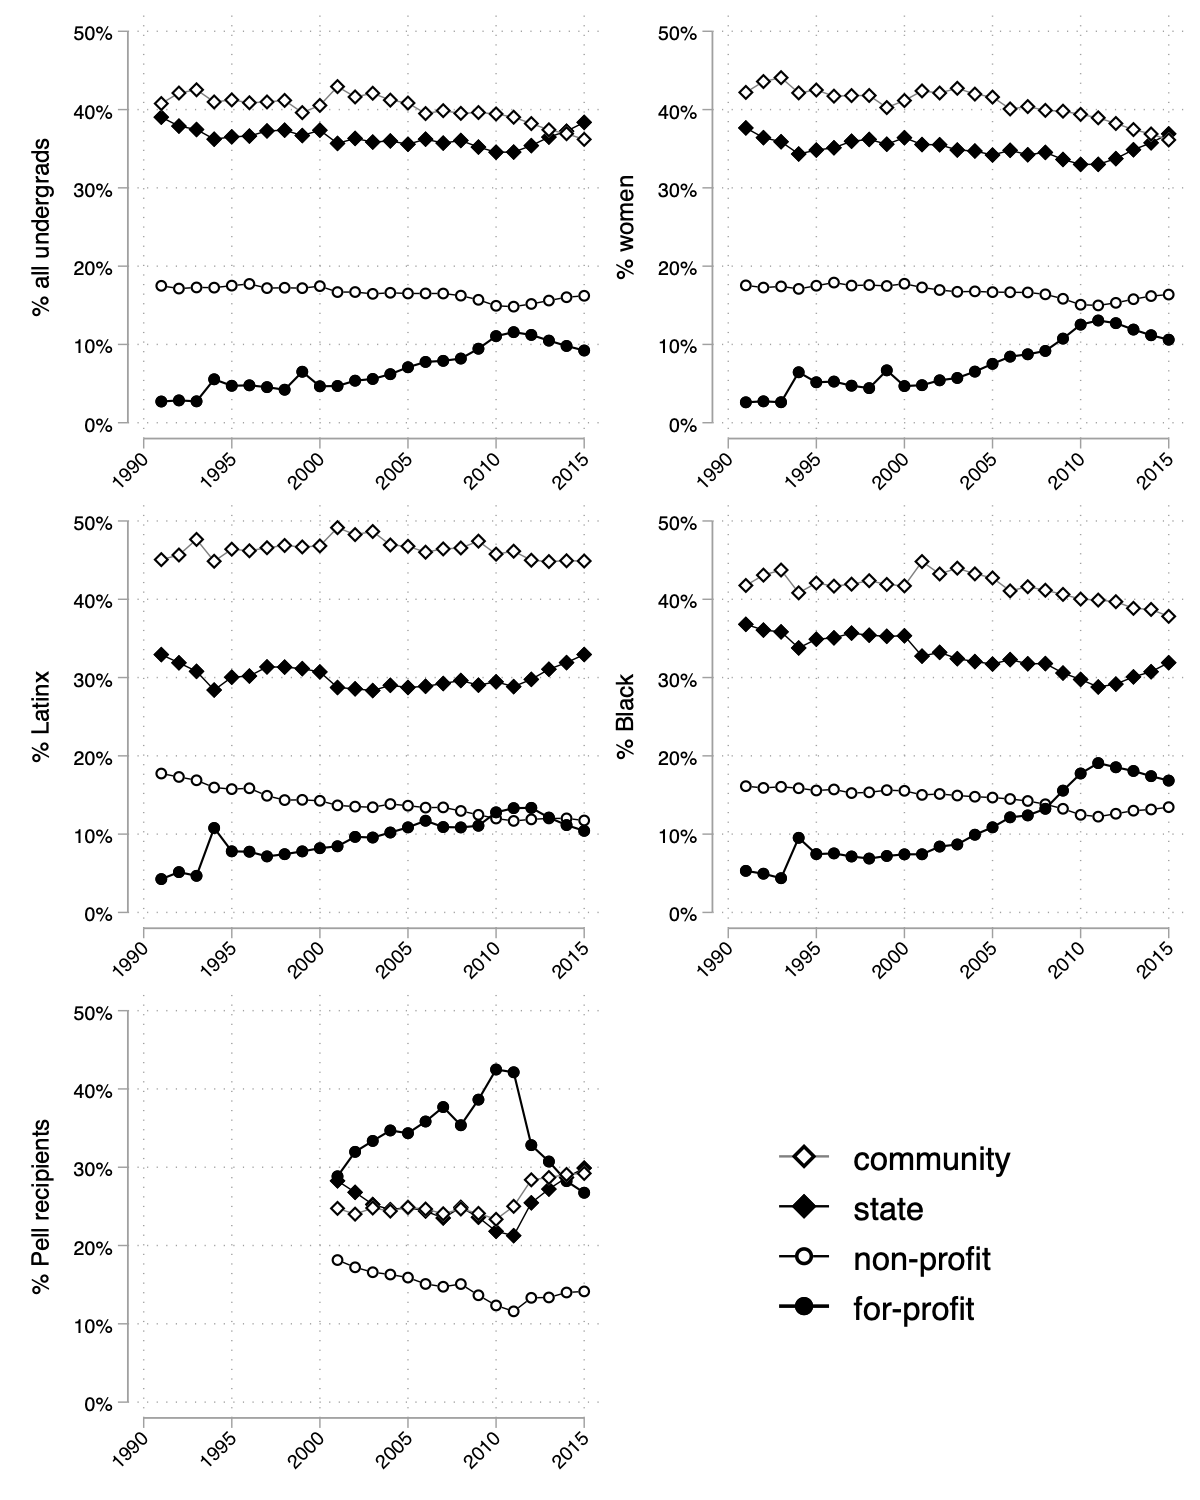






file /Users/Charlie/Dropbox/Stata_Notebooks/Bankers/Chapter 5 - The Bottom -
    For-Profits/figures/f5_1_percent_enrollment_by_sector.pdf saved as PDF
    format


In [11]:
set scheme plotplainblind
grc1leg undergrads women latinx black pell, cols(2) ycommon xcommon ///
position(5) ring(0) imargin(zero) xsize(8) ysize(10) iscale(.6) ///
graphregion(margin(small)) name(adjusted_outcomes, replace)
graph display adjusted_outcomes, xsize(8) ysize(10)
graph export figures/f5_1_percent_enrollment_by_sector.pdf, replace